#Verwerken van API en downloaden van 

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

In [12]:
import requests
import pandas as pd

api_key = 'd5184c3b4e'
cities = [
    'Assen', 'Lelystad', 'Leeuwarden', 'Arnhem', 'Groningen', 'Maastricht', 
    'Eindhoven', 'Den Helder', 'Enschede', 'Amersfoort', 'Middelburg', 'Rotterdam'
]
liveweer = []
wk_verw = []
uur_verw = []
api_data = []

for city in cities:
    api_url = f'https://weerlive.nl/api/weerlive_api_v2.php?key={api_key}&locatie={city}'
    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()
        if 'liveweer' in data:
            liveweer.extend(data['liveweer'])
        if 'wk_verw' in data:
            for entry in data['wk_verw']:
                entry['plaats'] = city
            wk_verw.extend(data['wk_verw'])
        if 'uur_verw' in data:
            for entry in data['uur_verw']:
                entry['plaats'] = city
            uur_verw.extend(data['uur_verw'])
        if 'api_data' in data:
            api_data.extend(data['api'])

    else:
        print(f"Error fetching data for {city}: {response.status_code}")

df_liveweer = pd.DataFrame(liveweer)
df_wk_verw = pd.DataFrame(wk_verw)
df_uur_verw = pd.DataFrame(uur_verw)
df_api_data = pd.DataFrame(api_data)
print(df_liveweer)


        plaats   timestamp                 time  temp  gtemp         samenv  \
0        Assen  1741165084  05-03-2025 09:58:04   6.5    3.1  Licht bewolkt   
1     Lelystad  1741175283  05-03-2025 12:48:03   7.3    5.0  Licht bewolkt   
2   Leeuwarden  1741165084  05-03-2025 09:58:04   7.1    3.6  Licht bewolkt   
3       Arnhem  1741175283  05-03-2025 12:48:03   7.8    5.8  Licht bewolkt   
4    Groningen  1741165084  05-03-2025 09:58:04   6.5    3.1  Licht bewolkt   
5   Maastricht  1741175283  05-03-2025 12:48:03   7.3    5.0  Licht bewolkt   
6    Eindhoven  1741175283  05-03-2025 12:48:03   8.2    7.4  Licht bewolkt   
7   Den Helder  1741175283  05-03-2025 12:48:03   8.4    5.2  Licht bewolkt   
8     Enschede  1741175283  05-03-2025 12:48:03   7.9    5.8  Licht bewolkt   
9   Amersfoort  1741175283  05-03-2025 12:48:03   7.7    6.2  Licht bewolkt   
10  Middelburg  1741175283  05-03-2025 12:48:03   6.5    4.9  Licht bewolkt   
11   Rotterdam  1741175283  05-03-2025 12:48:03   8.

pd.DataFrame.from_dict(data)

In [2]:
# Save to CSV file
df_liveweer.to_csv('WL_LiveWeer.csv')
df_wk_verw.to_csv('WL_week_werwachting.csv')
df_uur_verw.to_csv('WL_uur_werwachting.csv')
df_api_data.to_csv('WL_API.csv')

Moet het volgende weten voordat ik verder kan:
1. Hoe kan ik locatie zetten bij uur- en weekverwachting? Kan ik 'plaats' van LiveWeer mergen met de andere twee DFs? (Done)

# Visualisaties #


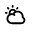
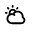
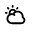
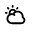
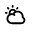
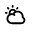
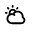
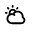
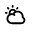
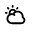
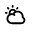
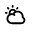

In [ ]:
import folium
import pandas as pd
from folium.features import CustomIcon

# City coordinations for icon placements
city_coords = {
    "Assen": [52.9929, 6.5642],
    "Lelystad": [52.5185, 5.4714],
    "Leeuwarden": [53.2012, 5.7999],
    "Arnhem": [51.9851, 5.8987],
    "Groningen": [53.2194, 6.5665],
    "Maastricht": [50.8514, 5.6910],
    "Eindhoven": [51.4416, 5.4697],
    "Den Helder": [52.9563, 4.7601],
    "Enschede": [52.2215, 6.8937],
    "Amersfoort": [52.1561, 5.3878],
    "Middelburg": [51.4988, 3.6136],
    "Rotterdam": [51.9225, 4.4792],
}

# Weather condition to icon mapping
weather_icons = {
    "zonnig": "zonnig.png",
    "bewolkt": "bewolkt.png",
    "half bewolkt": "halfbewolkt.png",
    "licht bewolkt": "halfbewolkt.png",
    "regen": "regen.png",
    "buien": "buien.png",
    "mist": "mist.png",
    "sneeuw": "sneeuw.png",
    "onweer": "bliksem.png",
    "hagel": "hagel.png",
    "heldere nacht": "helderenacht.png",
    "nachtmist": "nachtmist.png",
    "wolkennacht": "wolkennacht.png",
    "zwaar bewolkt": "zwaarbewolkt.png"
}

# Add lat/lon to df_liveweer
df_liveweer["lat"] = df_liveweer["plaats"].map(lambda city: city_coords.get(city, [None, None])[0])
df_liveweer["lon"] = df_liveweer["plaats"].map(lambda city: city_coords.get(city, [None, None])[1])

# Create a folium map centered over the Netherlands
nl_map = folium.Map(location=[52.3, 5.3], zoom_start=8)

for index, row in df_liveweer.iterrows():
    weather_desc = row['samenv'].lower()
    icon_file = weather_icons.get(weather_desc, "bewolkt.png")  # Default to "bewolkt.png" if no match
    icon_path = f"iconen-weerlive/{icon_file}"  # Folder path updated
    
    popup_text = f"{row['plaats']}: {row['temp']}°C, {row['samenv']}"
    
    # Add marker with the custom weather icon
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=popup_text,
        tooltip=row["plaats"],
        icon=CustomIcon(icon_path, icon_size=(30, 30))
    ).add_to(nl_map)


# Display the map
nl_map
